CFAR10 dataset: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck
image sizes 3*32*32. 
- 3 channel color images of 32*32 pixels

- Training steps:
  
    - load and normalize CIFAR10 training and test datasets using 
    - "torchvision"
    - define a convolutional neural network
    - define a loss function
    - train the network on train data
    - test the network on test data

In [1]:
#%% Loading and normalizing CIFAR10
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## 1-Read Dataset
- Veriyi indirirken tensor formatında ve normalize ederek indirmesi için aşağıdaki kod yazılır.

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [3]:
trainset = torchvision.datasets.CIFAR10(root = "./data",train = True, download= True, transform = transform)
testset = torchvision.datasets.CIFAR10(root = "./data",train = False, download= True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


## 2-Data Load

In [4]:
batch_size = 4 # bir defada gösterilen resim sayısı
trainloader = torch.utils.data.DataLoader(trainset,batch_size=batch_size)
testloader = torch.utils.data.DataLoader(testset,batch_size=batch_size)

In [5]:
classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

In [6]:
def imshow(img):
    img = img/2 + 0.5 # un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

In [7]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

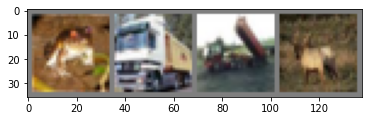

In [8]:
# show images
imshow(torchvision.utils.make_grid(images))

## 3-Create CNN Model

In [9]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        # 1 input image channel, 6 output channels, 5*5 square conv
        # kernel
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        # y = wx + b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        # max pooling over a (2,2) window
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 4-Select GPU

In [58]:
use_gpu = False # harici ekran kartı olmadığı için false yapıldı.

In [59]:
def gpuControl():
    net = None
    if use_gpu:
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        print("Device: ", device)
        if torch.cuda.is_available():
            net = Net().to(device)
            print("GPU is available")
            print(torch.cuda.device_count())
            print(torch.cuda.get_device_name())
    else:
        net = Net()
        print("cpu")
    return net    

In [62]:
#% loss function and optimizer
net=gpuControl()
error = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001, momentum=0.8)

cpu


## 5-Train Data

In [63]:
for epoch in range(2):  # loop over the dataset multiple times
    
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader,0):
        
        # get the inputs 
        inputs , labels = data
        
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if use_gpu:
            if torch.cuda.is_available():
                inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the optimizer gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = error(outputs,labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        if i % 2000 == 1999: # print every 2000 mini batches
            print("[%d, %5d] loss: %.3f" % (epoch + 1, i+1,running_loss/2000))
            running_loss = 0.0
    
print( "Training is done")

[1,  2000] loss: 2.294
[1,  4000] loss: 2.134
[1,  6000] loss: 1.936
[1,  8000] loss: 1.749
[1, 10000] loss: 1.658
[1, 12000] loss: 1.585
[2,  2000] loss: 1.517
[2,  4000] loss: 1.487
[2,  6000] loss: 1.420
[2,  8000] loss: 1.366
[2, 10000] loss: 1.394
[2, 12000] loss: 1.346
Training is done


## 6-Test Data

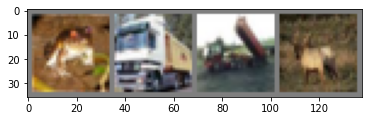

In [64]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))  

In [66]:
outputs = net(images)   
_, predicted = torch.max(outputs, 1)

print("predicted: ", " ".join("%5s" % classes[predicted[j]] for j in range(4)))

predicted:   frog truck truck  frog


In [67]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images,labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print("Accuracy of the network on the 10000 test images: %d %%" % (100*correct/total))   

Accuracy of the network on the 10000 test images: 52 %
